<a href="https://colab.research.google.com/github/utopickaiser/AI-Homework/blob/main/AI_Exercise_W5_Fuzzy_Controller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy

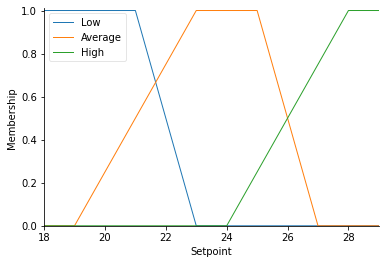

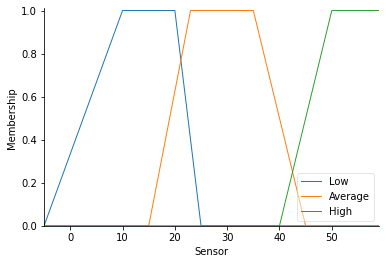

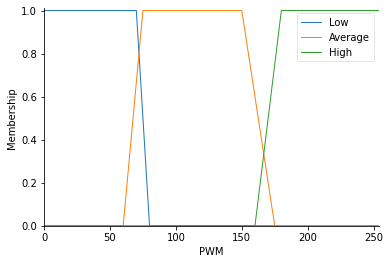

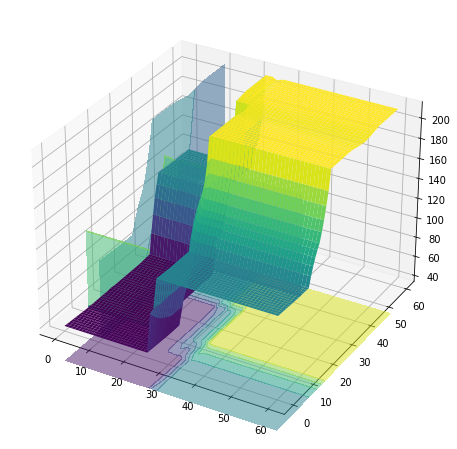

In [13]:
# Temperature control DC motor
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

sp = ctrl.Antecedent(np.arange(18,30,1),'Setpoint')
se = ctrl.Antecedent(np.arange(-5,60,1),'Sensor')
pwm = ctrl.Consequent(np.arange(0,255,1),'PWM')
# Thiết lập cách giá trị
sp['Low'] = fuzz.trapmf(sp.universe,[18,18,21,23])
sp['Average'] = fuzz.trapmf(sp.universe,[19,23,25,27])
sp['High'] = fuzz.trapmf(sp.universe,[24,28,30,30])

se['Low'] = fuzz.trapmf(se.universe,[-5,10,20,25])
se['Average'] = fuzz.trapmf(se.universe,[15,23,35,45])
se['High'] = fuzz.trapmf(se.universe,[40,50,60,60])

pwm['Low'] = fuzz.trapmf(pwm.universe,[0,0,70,80])
pwm['Average'] = fuzz.trapmf(pwm.universe,[60,75,150,175])
pwm['High'] = fuzz.trapmf(pwm.universe,[160,180,255,255])
sp.view()
se.view()
pwm.view()
rule0 = ctrl.Rule(antecedent = (sp['Low'] & se['Low'])|
                  (sp['Low'] & se['Average'])|(sp['Average'] & se['Low']),
                   consequent = pwm['Low'], label = 'Rule Low')

rule1 = ctrl.Rule(antecedent = (sp['Average'] & se['Average'])|
                  (sp['High'] & se['Low'])|(sp['Low'] & se['High']),
                   consequent = pwm['Average'], label = 'Rule Average')

rule2 = ctrl.Rule(antecedent = (sp['High'] & se['High'])|
                  (sp['High'] & se['Average'])|(sp['Average'] & se['High']),
                   consequent = pwm['High'], label = 'Rule High')

system = ctrl.ControlSystem(rules = [rule0,rule1,rule2])
sim = ctrl.ControlSystemSimulation(system, flush_after_run = 61*61+1)
upsampled = np.linspace(0,60,61)
x,y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)
for i in range(61):
  for j in range(61):
    for k in range(61):
      sim.input['Setpoint'] = x[i,j]
      sim.input['Sensor'] = y[i,j]
      sim.compute()
      z[i,j] = sim.output['PWM']
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection = '3d')
suf = ax.plot_surface(x,y,z, rstride = 1, cstride = 1, cmap = 'viridis',
                      linewidth = 0.4, antialiased = True)
cset = ax.contourf(x,y,z, zdir = 'z', offset = 3, cmap = 'viridis', alpha = 0.5)
cset = ax.contourf(x,y,z, zdir = 'x', offset = 11, cmap = 'viridis', alpha = 0.5 )
cset = ax.contourf(x,y,z, zdir = 'y', offset = 11, cmap = 'viridis', alpha = 0.5 )
ax.view_init(30,300)


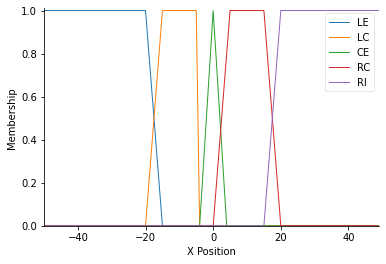

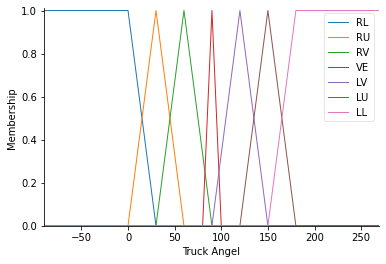

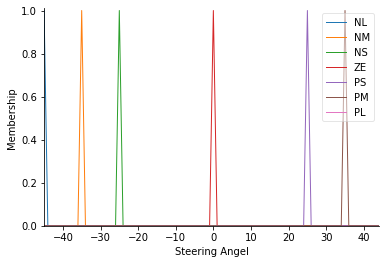

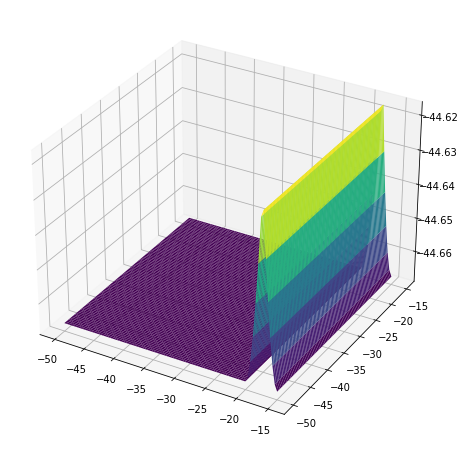

In [6]:
# Mobile Robot
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
xpos = ctrl.Antecedent(np.arange(-50,50,1),'X Position')
tr = ctrl.Antecedent(np.arange(-90,270,1),'Truck Angel')
st = ctrl.Consequent(np.arange(-45,45,1),'Steering Angel')
# Thiết lập cách giá trị
xpos['LE'] = fuzz.trapmf(xpos.universe,[-50,-50,-20,-15])
xpos['LC'] = fuzz.trapmf(xpos.universe,[-20,-15,-5,-4])
xpos['CE'] = fuzz.trapmf(xpos.universe,[-4,0,0,4])
xpos['RC'] = fuzz.trapmf(xpos.universe,[0,5,15,20])
xpos['RI'] = fuzz.trapmf(xpos.universe,[15,20,50,50])

tr['RL'] = fuzz.trapmf(tr.universe,[-90,-90,0,30])
tr['RU'] = fuzz.trapmf(tr.universe,[0,30,30,60])
tr['RV'] = fuzz.trapmf(tr.universe,[30,60,60,90])
tr['VE'] = fuzz.trapmf(tr.universe,[80,90,90,100])
tr['LV'] = fuzz.trapmf(tr.universe,[90,120,120,150])
tr['LU'] = fuzz.trapmf(tr.universe,[120,150,150,180])
tr['LL'] = fuzz.trapmf(tr.universe,[150,180,270,270])

st['NL'] = fuzz.trimf(st.universe,[-45,-45,-45])
st['NM'] = fuzz.trimf(st.universe,[-35,-35,-35])
st['NS'] = fuzz.trimf(st.universe,[-25,-25,-25])
st['ZE'] = fuzz.trimf(st.universe,[0,0,0])
st['PS'] = fuzz.trimf(st.universe,[25,25,25])
st['PM'] = fuzz.trimf(st.universe,[35,35,35])
st['PL'] = fuzz.trimf(st.universe,[45,45,45])

xpos.view()
tr.view()
st.view()
rule0 = ctrl.Rule(antecedent = (xpos['LE'] & tr['RL'])|
                  (xpos['LE'] & tr['RU'])|(xpos['LE'] & tr['RV'])|
                  (xpos['LC'] & tr['RL'])|(xpos['LC'] & tr['RU']),
                   consequent = st['NL'], label = 'Rule NL')
rule1 = ctrl.Rule(antecedent = (xpos['LE'] & tr['VE'])|
                  (xpos['LE'] & tr['LV'])|(xpos['LC'] & tr['RV'])|
                  (xpos['LC'] & tr['VE'])|(xpos['CE'] & tr['RL']|
                  (xpos['RC'] & tr['RU'])|(xpos['CE'] & tr['RU'])),
                   consequent = st['NM'], label = 'Rule NM')
rule2 = ctrl.Rule(antecedent = (xpos['LE'] & tr['LU'])|
                  (xpos['LC'] & tr['LV'])|(xpos['CE'] & tr['RV'])|
                  (xpos['RC'] & tr['RU'])|(xpos['RI'] & tr['RL']),
                   consequent = st['NS'], label = 'Rule NS')
rule3 = ctrl.Rule(antecedent = (xpos['CE'] & tr['VE']),
                   consequent = st['ZE'], label = 'Rule ZE')
rule4 = ctrl.Rule(antecedent = (xpos['LE'] & tr['LL'])|
                  (xpos['LC'] & tr['LU'])|(xpos['CE'] & tr['LV'])|
                  (xpos['RC'] & tr['RV'])|(xpos['RI'] & tr['RU']),
                   consequent = st['PS'], label = 'Rule PS')
rule5 = ctrl.Rule(antecedent = (xpos['LC'] & tr['LL'])|
                  (xpos['CE'] & tr['LU'])|(xpos['CE'] & tr['LL'])|
                  (xpos['RC'] & tr['VE'])|(xpos['RC'] & tr['LV']|
                  (xpos['RI'] & tr['RV'])|(xpos['RI'] & tr['VE'])),
                   consequent = st['PM'], label = 'Rule PM')
rule6 = ctrl.Rule(antecedent = (xpos['RC'] & tr['LL'])|
                  (xpos['RC'] & tr['LU'])|(xpos['RI'] & tr['LL'])|
                  (xpos['RI'] & tr['LU'])|(xpos['RI'] & tr['LV']),
                   consequent = st['PL'], label = 'Rule PL')


system = ctrl.ControlSystem(rules = [rule0,rule1,rule2,rule3,rule4,rule5,rule6])
sim = ctrl.ControlSystemSimulation(system, flush_after_run = 91*91+1)
upsampled = np.linspace(-50,-15,91)
x,y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)
for i in range(91):
  for j in range(91):
    for k in range(91):
      sim.input['X Position'] = x[i,j]
      sim.input['Truck Angel'] = y[i,j]
      sim.compute()
      z[i,j] = sim.output['Steering Angel']
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection = '3d')
suf = ax.plot_surface(x,y,z, rstride = 1, cstride = 1, cmap = 'viridis',
                      linewidth = 0.4, antialiased = True)
cset = ax.contourf(x,y,z, zdir = 'z', offset = 3, cmap = 'viridis', alpha = 0.5)
cset = ax.contourf(x,y,z, zdir = 'x', offset = 11, cmap = 'viridis', alpha = 0.5 )
cset = ax.contourf(x,y,z, zdir = 'y', offset = 11, cmap = 'viridis', alpha = 0.5 )
ax.view_init(30,300)
